In [1]:
#Importar a biblioteca pandas e dar o nome de pd
import pandas as pd

In [2]:
#importar arquivo csv do github
df = pd.read_csv("https://4va.github.io/biodatasci/data/gapminder.csv")

In [3]:
#Mostra as 5 primeiras linhas (por default) da tabela
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
#mostra quantas linhas e colunas respectivamente existem na tabela
df.shape

(1704, 6)

In [5]:
#Mostra as ultimas 5 linhas da tabela, modificado para mostrar 15 linhas 
df.tail(15)

,country,continent,year,lifeExp,pop,gdpPercap
1689,Zambia,Africa,1997,40.238,9417789,1071.353818
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1692,Zimbabwe,Africa,1952,48.451,3080907,406.884115
1693,Zimbabwe,Africa,1957,50.469,3646340,518.764268
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071
1696,Zimbabwe,Africa,1972,55.635,5861135,799.362176
1697,Zimbabwe,Africa,1977,57.674,6642107,685.587682
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041


In [6]:
#Mostra quais tipos de dados estão sendo trabalhados em cada coluna
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [7]:
#renomeia nomes de colunas desejadas
df = df.rename(columns={"country":"Pais","continent":"Continente","year":"Ano","lifeExp":"ExpVida"})

In [8]:
#Mostra os nomes das colunas da tabela
df.columns

Index(['Pais', 'Continente', 'Ano', 'ExpVida', 'pop', 'gdpPercap'], dtype='object')

In [9]:
#Mostra resumo de operações básicas com os dados da tabela
df.describe()

,Ano,ExpVida,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [10]:
#mostra cada elemento da coluna somente uma vez
df["Continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [11]:
#Atribui a uma variavel uma nova tabela somente com os valores iguais ao desejado diretamente da tabela de trabalho 
Asia = df.loc[df["Continente"]=="Asia"]
Asia.head()

,Pais,Continente,Ano,ExpVida,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
#agrupa as informações pela coluna desejada, utilizando a contagem de paises atravez da contagem única do nome
df.groupby("Continente")["Pais"].nunique()

Continente
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: Pais, dtype: int64

In [13]:
#Retorna a média dos valores
df["pop"].mean()

29601212.325117372

In [14]:
#Retorna a soma dos valores
df["pop"].sum()

50440465802

In [15]:
#Cria uma lista temporária com um número definido de amostras aleatórias retiradas da tabela de trabalho
Asia.sample(10)

,Pais,Continente,Ano,ExpVida,pop,gdpPercap
1488,Syria,Asia,1952,45.883,3661549,1643.485354
1493,Syria,Asia,1977,61.195,7932503,3195.484582
767,Israel,Asia,2007,80.745,6426679,25523.277100
1366,Singapore,Asia,2002,78.770,4197776,36023.105400
732,Iraq,Asia,1952,45.320,5441766,4129.766056
854,Kuwait,Asia,1962,60.470,358266,95458.111760
806,Jordan,Asia,1962,48.126,933559,2348.009158
938,Malaysia,Asia,1962,55.737,8906385,2036.884944
862,Kuwait,Asia,2002,76.904,2111561,35110.105660
1660,West Bank and Gaza,Asia,1972,56.532,1089572,3133.409277


In [16]:
#Conta quantas células com valor nulo cada coluna possui
df.isnull().sum()

Pais          0
Continente    0
Ano           0
ExpVida       0
pop           0
gdpPercap     0
dtype: int64

In [17]:
#Substitui valores nulos da coluna informada por um valor também informado, inplace é usado para carregar as mudanças assim que o código for compilado
df["Ano"].fillna(0,inplace=True)

In [18]:
#Remove as linhas com valores nulos
df.dropna(how="all", inplace=True)

In [19]:
#importando biblioteca para randomizar numeros
import random
#criando uma nova coluna para data completa
#Começando importando o ano e transformando para str
df["Data"] = df["Ano"]
df["Data"] = df["Data"].astype(str)
#atribuindo um valor aleatório para mes e dia e salvando este valor em variáveis
mes = str(random.randint(1,12))
dia = str(random.randint(1,28))
#concatenando os valores na nova coluna
df["Data"] = df["Data"]+"-"+mes+"-"+dia
#transformando a nova coluna para o tipo datetime do pandas
df["Data"] = pd.to_datetime(df["Data"])

In [20]:
#Verificando se a coluna foi adicionada
df.sample(20)

,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data
518,Finland,Europe,1962,68.750,4491443,9371.842561,1962-02-04
1056,Namibia,Africa,1952,41.725,485831,2423.780443,1952-02-04
117,Belgium,Europe,1997,77.530,10199787,27561.196630,1997-02-04
1106,Nicaragua,Americas,1962,48.632,1590597,3634.364406,1962-02-04
930,Malawi,Africa,1982,45.642,6502825,632.803921,1982-02-04
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,2007-02-04
202,Burkina Faso,Africa,2002,50.650,12251209,1037.645221,2002-02-04
308,Colombia,Americas,1992,68.421,34202721,5444.648617,1992-02-04
1512,Tanzania,Africa,1952,41.215,8322925,716.650072,1952-02-04
544,Gabon,Africa,1972,48.690,537977,11401.948410,1972-02-04


In [21]:
#Verificando se o tipo de dados de "Data" é datetime
df.dtypes

Pais                  object
Continente            object
Ano                    int64
ExpVida              float64
pop                    int64
gdpPercap            float64
Data          datetime64[ns]
dtype: object

In [22]:
#extraindo mes e dia
df["Mês gerado"], df["Dia gerado"] = (df["Data"].dt.month, df["Data"].dt.day)

In [23]:
#Verificando se as colunas foram adicionadas
df.sample(10)

,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data,Mês gerado,Dia gerado
442,Dominican Republic,Americas,2002,70.847,8650322,4563.808154,2002-02-04,2,4
63,Australia,Oceania,1967,71.100,11872264,14526.124650,1967-02-04,2,4
1537,Togo,Africa,1957,41.208,1357445,925.908320,1957-02-04,2,4
396,Czech Republic,Europe,1952,66.870,9125183,6876.140250,1952-02-04,2,4
1201,Peru,Americas,1957,46.263,9146100,4245.256698,1957-02-04,2,4
529,France,Europe,1957,68.930,44310863,8662.834898,1957-02-04,2,4
1253,Puerto Rico,Americas,1977,73.440,3080828,9770.524921,1977-02-04,2,4
787,Jamaica,Americas,1987,71.770,2326606,6351.237495,1987-02-04,2,4
893,Liberia,Africa,1977,43.764,1703617,640.322438,1977-02-04,2,4
1363,Singapore,Asia,1987,73.560,2794552,18861.530810,1987-02-04,2,4


In [24]:
#Extraindo a data mais antiga
df["Data"].min()

Timestamp('1952-02-04 00:00:00')

In [25]:
#Extraindo a data mais atual
df["Data"].max()

Timestamp('2007-02-04 00:00:00')

In [26]:
#Ordenando a contagem de quantos dados foram coletados de cada continente
df["Continente"].value_counts(ascending=False)

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: Continente, dtype: int64

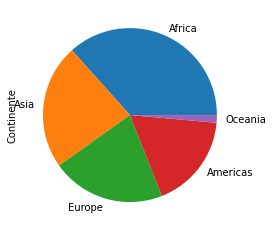

In [27]:
#plotando o valor da ultima linha de código em gráfico pizza
df["Continente"].value_counts().plot.pie();

In [28]:
#Verificando a média da expectativa de vida no mundo ao longo dos anos 
df.groupby(df["Data"].dt.year)["ExpVida"].mean()

Data
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: ExpVida, dtype: float64

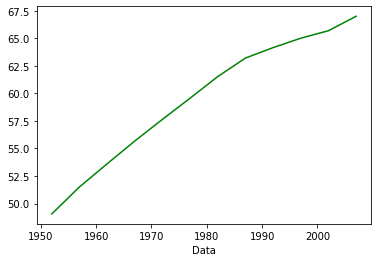

In [112]:
#Plotando os valores obtidos na ultima linha de código
df.groupby(df["Data"].dt.year)["ExpVida"].mean().plot(color="green");

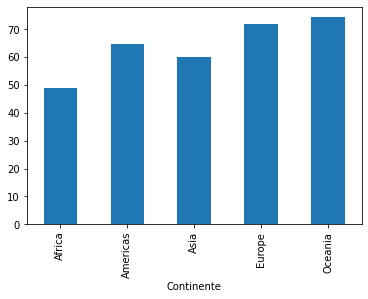

In [30]:
#Gráfico da expectaiva de vida agrupada por continentes
df.groupby(df["Continente"])["ExpVida"].mean().plot.bar();

In [31]:

df.groupby(df["Pais"])["ExpVida"].max()

Pais
Afghanistan           43.828
Albania               76.423
Algeria               72.301
Angola                42.731
Argentina             75.320
                       ...  
Vietnam               74.249
West Bank and Gaza    73.422
Yemen, Rep.           62.698
Zambia                51.821
Zimbabwe              62.351
Name: ExpVida, Length: 142, dtype: float64

In [33]:
df.loc[df["ExpVida"]==df["ExpVida"].max()]

,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data,Mês gerado,Dia gerado
803,Japan,Asia,2007,82.603,127467972,31656.06806,2007-02-04,2,4


In [34]:
df.loc[df["ExpVida"]==df["ExpVida"].min()]

,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data,Mês gerado,Dia gerado
1292,Rwanda,Africa,1992,23.599,7290203,737.068595,1992-02-04,2,4


In [113]:
#Criando uma tabela para as maiores e outra para as menores expectativas de vida de cada país
lista = df["Pais"].unique()

#Identifica o menor valor da expextativa de vida para inicializar a variavel e ser removido após complitude da tabela
df_maior = df.loc[df["ExpVida"]==df["ExpVida"].min()]
#Identifica o index da linha utilizada para iniciar a variável
deletarmenor = df.index[df["ExpVida"]==df["ExpVida"].min()].tolist()
deletarmenor[0]

#Identifica o maior valor da expextativa de vida para inicializar a variavel e ser removido após complitude da tabela
df_menor = df.loc[df["ExpVida"]==df["ExpVida"].max()]
#Identifica o index da linha utilizada para iniciar a variável
deletarmaior = df.index[df["ExpVida"]==df["ExpVida"].max()].tolist()
deletarmaior[0]

#para cada país na tabela original, verifica qual o maior e o menor valor da expectativa de vida, e aloca em uma nova tabela
for paises in lista:
  pais = df.loc[df["Pais"]==paises]
  menor_temp = pais.loc[pais["ExpVida"]==pais["ExpVida"].min()]
  df_menor = pd.concat([df_menor, menor_temp])
  maior_temp = pais.loc[pais["ExpVida"]==pais["ExpVida"].max()]
  #identifica a diferença de menor e maior Exp de Vida de cada país
  maior_temp["Diferenca"]=pais["ExpVida"].max()-pais["ExpVida"].min()
  df_maior = pd.concat([df_maior, maior_temp])

#remove os valores iniciais utilizados para declarar cada variável
df_maior=df_maior.drop(index = deletarmenor[0])
df_menor=df_menor.drop(index = deletarmaior[0])

#Unifica as duas tabelas em uma única tabela
df_maior_e_menor = pd.concat([df_maior,df_menor])

#Mostra os 5 maiores valores de expectativa de vida por país
df_maior.sort_values(by=["ExpVida"],ascending=False).head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data,Mês gerado,Dia gerado,Diferenca
803,Japan,Asia,2007,82.603,127467972,31656.06806,2007-02-04,2,4,19.573
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,2007-02-04,2,4,21.248
695,Iceland,Europe,2007,81.757,301931,36180.78919,2007-02-04,2,4,9.267
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907,2007-02-04,2,4,12.081
71,Australia,Oceania,2007,81.235,20434176,34435.36744,2007-02-04,2,4,12.115


In [93]:
#Mostra os 5 menores valores de expectativa de vida por país
df_menor.sort_values(by=["ExpVida"],ascending=True).head(5)

,Pais,Continente,Ano,ExpVida,pop,gdpPercap,Data,Mês gerado,Dia gerado
1292,Rwanda,Africa,1992,23.599,7290203,737.068595,1992-02-04,2,4
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,1952-02-04,2,4
552,Gambia,Africa,1952,30.000,284320,485.230659,1952-02-04,2,4
36,Angola,Africa,1952,30.015,4232095,3520.610273,1952-02-04,2,4
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736,1952-02-04,2,4


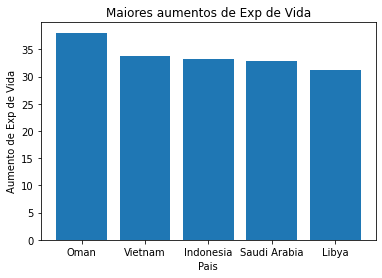

In [142]:
#Criando um gráfico dos maiores aumentos de expectativa de vida usando matplotlib
maiores_diferencas = df_maior_e_menor.sort_values(by=["Diferenca"],ascending=False).head(5)
import matplotlib.pyplot as plt
plt.xlabel("Pais")
plt.ylabel("Aumento de Exp de Vida")
plt.title("Maiores aumentos de Exp de Vida")
plt.bar(maiores_diferencas["Pais"],maiores_diferencas["Diferenca"]);
plt.savefig("Grafico do aumento de Expectativa de vida.png")